In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

In [12]:
train_df=pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')

print(train_df.shape)
train_df.head()
#id, 생존여부(생존-1)
#Pclass: 1(1등급),2,3(categorical)
#SibSp: sibling and spouser 의 수
#Parch: parent and children 의 수
#Fare: 탑승비용
#cabin: 선실 번호
#embarked: 배에 승선했던 장소(categorical)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
## 결측치 missing value 다루기

In [15]:
train_df.isnull().sum() #891중에서 나이에서 177개

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

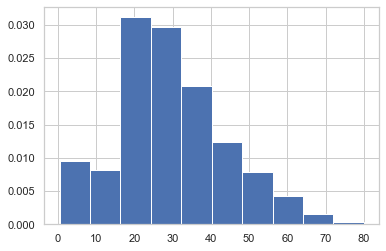

In [16]:
# Age 다빼기엔 데이터가 얼마없어서 임의값 넣기(해당 분포 중심값, 평균..등을 넣음)
train_df['Age'].hist(bins=10, density=True)  #중심이 좀 치우쳐져있어서 중심값넣기로 결정!


In [17]:
train_df['Age'].fillna(train_df['Age'].median(skipna=True), inplace=True)

<AxesSubplot:>

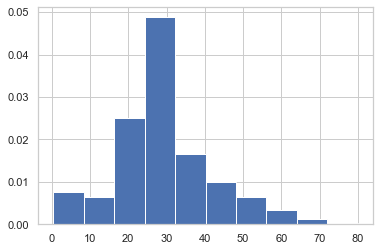

In [18]:
train_df['Age'].hist(bins=10, density=True)

In [19]:
#cabin 은 너무 많은양의 정보가 없기도 하고 인과성이 떨어져 삭제하기로 결정!
train_df.drop('Cabin',axis=1, inplace=True)

In [20]:
#embarked 는 2개만 missing value라서 S값이 압도적으로 많아서 S로 넣어주기로 결정
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train_df['Embarked'].fillna('S', inplace=True)

In [22]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
# test dataset 의 결측치 확인
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
test_df['Age'].fillna(test_df['Age'].median(skipna=True), inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [25]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [26]:
test_df['Fare'].fillna(test_df['Fare'].median(skipna=True), inplace=True)

In [27]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
#test_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True) #필요없는거 삭제
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [29]:
train_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True) #필요없는거 삭제
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
#categorical 변수 변환
train_data = pd.get_dummies(train_df, columns=['Pclass','Sex','Embarked'])
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [31]:
train_data.drop(['Pclass_3','Sex_male','Embarked_S'], axis=1, inplace=True)
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,22.0,1,0,7.2500,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,0,0,0


<AxesSubplot:>

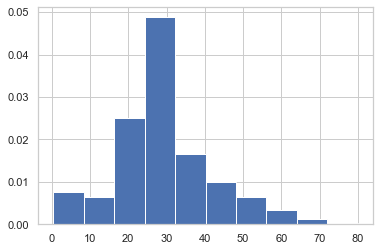

In [32]:
train_data['Age'].hist(bins=10, density=True)

# 스스로 분석해보기_!!

In [33]:
#생존여부에 따라 attribue 분포에 차이가 있는지
# logistic regression 이진 분류 사용해요기
# 학습시킨 logistic regression을 확인해 변수의 유용성 확인
# confusion matrix 그려서 점수 도출

In [34]:
import matplotlib.pyplot as plt

In [35]:
number_sur = train_data['Survived'] == 1 #생존한 사람

print(f'생존한 사람: {len(train_data[number_sur])}')
print(f'생존율: {len(train_data[number_sur])/891*100}')

생존한 사람: 342
생존율: 38.38383838383838


### 일단 기본 생존율 38.38% 

<AxesSubplot:>

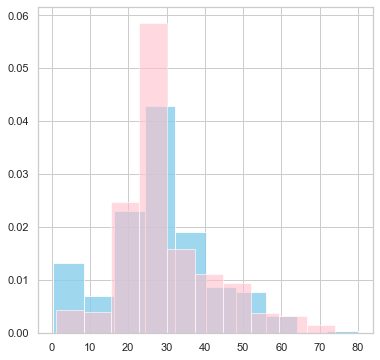

In [36]:
# 생존여부에 따른 나이 분포
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

#생존한 사람의 나이분포
train_data[number_sur]['Age'].hist(bins=10, density=True, color='skyblue', alpha=0.8, ax=ax)

#생존하지 않은 사람의 나이분포
train_data[~number_sur]['Age'].hist(bins=10, density=True, color='pink', alpha=0.6, ax=ax)

## 10세 미만은 생존율이 다른 연령대에 비해 높아 보이고, 30대들은 생존율이 현저히 작아 보임.
## 실제로 연령별 체크해볼까??

In [37]:
train_data['Age']=train_data['Age'].apply(lambda x:int(x/10))
train_data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,2,1,0,7.2500,0,0,0,0,0
1,1,3,1,0,71.2833,1,0,1,1,0
2,1,2,0,0,7.9250,0,0,1,0,0
3,1,3,1,0,53.1000,1,0,1,0,0
4,0,3,0,0,8.0500,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0,1,0,0,0
887,1,1,0,0,30.0000,1,0,1,0,0
888,0,2,1,2,23.4500,0,0,1,0,0
889,1,2,0,0,30.0000,1,0,0,1,0


In [102]:
age0_9 = train_data['Age'] == 0
age10_19 = train_data['Age'] == 1
age20_29 = train_data['Age'] == 2
age30_39 = train_data['Age'] == 3
age40_49 = train_data['Age'] == 4
age50_59 = train_data['Age'] == 5
age60_69 = train_data['Age'] == 6
age70_79 = train_data['Age'] == 7

print(f'0에서 9세 생존율: {len(train_data[number_sur&age0_9])/len(train_data[age0_9])*100}')
print(f'10에서 19세 생존율: {len(train_data[number_sur&age10_19])/len(train_data[age10_19])*100}')
print(f'20에서 29세 생존율: {len(train_data[number_sur&age20_29])/len(train_data[age20_29])*100}')
print(f'30에서 39세 생존율: {len(train_data[number_sur&age30_39])/len(train_data[age30_39])*100}')
print(f'40에서 49세 생존율: {len(train_data[number_sur&age40_49])/len(train_data[age40_49])*100}')
print(f'50에서 59세 생존율: {len(train_data[number_sur&age50_59])/len(train_data[age50_59])*100}')
print(f'60에서 69세 생존율: {len(train_data[number_sur&age60_69])/len(train_data[age60_69])*100}')
print(f'70에서 79세 생존율: {len(train_data[number_sur&age70_79])/len(train_data[age70_79])*100}')
print(f'70대 생존인원수: {len(train_data[number_sur&age70_79])}')

0에서 9세 생존율: 61.29032258064516
10에서 19세 생존율: 40.19607843137255
20에서 29세 생존율: 32.49370277078086
30에서 39세 생존율: 43.712574850299404
40에서 49세 생존율: 38.20224719101123
50에서 59세 생존율: 41.66666666666667
60에서 69세 생존율: 31.57894736842105
70에서 79세 생존율: 0.0
70대 인원수: 0


## => 10세 미만이 확실히 생존율 높아보임.

In [93]:
#생존한 사람의 남녀 비율

f_male= train_data['Sex_female'] ==1
male= train_data['Sex_female'] ==0

print(f' 여자 생존인원:{len(train_data[number_sur&f_male])} , 여자 총인원: {len(train_data[f_male])}')
print(f' 남자 생존인원:{len(train_data[number_sur&~f_male])} , 남자 총인원: {len(train_data[~f_male])}')
print(f' 여자 생존율:{len(train_data[number_sur&f_male])/len(train_data[f_male])*100}')
print(f' 남자 생존율:{len(train_data[number_sur&f_male])/len(train_data[~f_male])*100}')

 여자 생존인원:233 , 여자 총인원: 314
 남자 생존인원:109 , 남자 총인원: 577
 여자 생존율:74.20382165605095
 남자 생존율:40.38128249566724


## 여자가 더많이 생존 했는 걸로 보임

In [87]:
class1= train_data['Pclass_1'] ==1
class2= train_data['Pclass_2'] ==1

print(f' 1등급 생존인원 : {len(train_data[number_sur&class1])}, 총인원: {len(train_data[class1])}')
print(f' 2등급 생존인원: {len(train_data[number_sur&class2])}, 총인원: {len(train_data[class2])}')
print(f' 1등급 생존율: {len(train_data[number_sur&class1])/len(train_data[class1])*100}')
print(f' 2등급 생존율: {len(train_data[number_sur&class2])/len(train_data[class2])*100}')

 1등급: 136, 총인원: 216
 2등급: 87, 총인원: 184
 1등급 생존율: 62.96296296296296
 2등급 생존율: 47.28260869565217


## ->1등급 클래스가 더 많은 인원이 생존했어 보임.

In [44]:
sur_fare = train_data['Fare'] #비용 최대최소
print(f'지불금액 최대: {max(sur_fare)} , 지불금액 최소: {min(sur_fare)}')

지불금액 최대: 512.3292 , 지불금액 최소: 0.0


In [45]:
train_data['Fare']=train_data['Fare'].apply(lambda x:int(x/10))
train_data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,2,1,0,0,0,0,0,0,0
1,1,3,1,0,7,1,0,1,1,0
2,1,2,0,0,0,0,0,1,0,0
3,1,3,1,0,5,1,0,1,0,0
4,0,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,1,0,0,0
887,1,1,0,0,3,1,0,1,0,0
888,0,2,1,2,2,0,0,1,0,0
889,1,2,0,0,3,1,0,0,1,0


<AxesSubplot:>

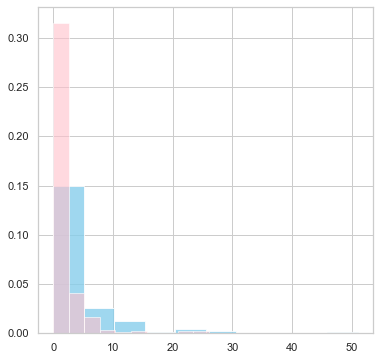

In [46]:
# 생존여부에 따른 지불금액분포
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

#생존한 사람의 지불금액분포
train_data[number_sur]['Fare'].hist(bins=10, density=True, color='skyblue', alpha=0.8, ax=ax)

#생존하지 않은 사람의 지불금액분포
train_data[~number_sur]['Fare'].hist(bins=10, density=True, color='pink', alpha=0.6, ax=ax)

## 지불금액 0원에 가까울수록 생존률이 낮아보임..?

<AxesSubplot:>

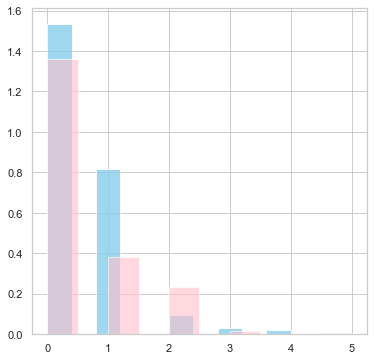

In [47]:
# 생존여부에 따른 동행 인원분포
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

#생존한 사람의 형제자매, 배우자 분포
train_data[number_sur]['SibSp'].hist(bins=10, density=True, color='skyblue', alpha=0.8, ax=ax)

#생존한 사람의 부모, 아이 수 분포
train_data[number_sur]['Parch'].hist(bins=10, density=True, color='pink', alpha=0.6, ax=ax)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
Xs = train_data[['Age','Sex_female','Pclass_1','Pclass_2','Fare','SibSp','Parch']]
Y = train_data['Survived']

logit_reg = LogisticRegression().fit(Xs,Y)

In [50]:
print(logit_reg.coef_)
print(logit_reg.intercept_)
print(logit_reg.classes_)
# 나이.          성별.        1등급        2등급         비용        SibSp   Parch

[[-0.31432668  2.62188823  1.8701614   1.0251806   0.03822149 -0.32224883
  -0.09796394]]
[-1.35313961]
[0 1]


In [51]:
pd.DataFrame({'coef': logit_reg.coef_[0]},
index = ['Age','Sex_female','Pclass_1','Pclass_2','Fare','SibSp','Parch'])

,coef
Age,-0.314327
Sex_female,2.621888
Pclass_1,1.870161
Pclass_2,1.025181
Fare,0.038221
SibSp,-0.322249
Parch,-0.097964


In [52]:
sum(logit_reg.predict(Xs)  == Y)/len(Y) #accuracy 정확도 확인
## 주의할 것: 나이와 비용은 나누기로 볼륨이 줄어든 상태!

0.7991021324354658

In [97]:
# 임의로 데이터 조작해서 실패한 거 같으니까_전처리해보기
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # Z스코어
Xs = sc.fit_transform(Xs)
print(Xs)
# 확실히 위의 값들과 다름을 볼수있음! 여윽시 표준화!
#   나이.          성별.        1등급        2등급         비용        SibSp   Parch

[[-0.31048834 -0.73769513 -0.56568542 ... -0.52809967  0.43279337
  -0.47367361]
 [ 0.42723196  1.35557354  1.76776695 ...  0.86343293  0.43279337
  -0.47367361]
 [-0.31048834  1.35557354 -0.56568542 ... -0.52809967 -0.4745452
  -0.47367361]
 ...
 [-0.31048834  1.35557354 -0.56568542 ... -0.13051893  0.43279337
   2.00893337]
 [-0.31048834 -0.73769513  1.76776695 ...  0.06827144 -0.4745452
  -0.47367361]
 [ 0.42723196 -0.73769513 -0.56568542 ... -0.52809967 -0.4745452
  -0.47367361]]


In [98]:
logit_reg2 =logit_reg.fit(Xs, Y)

In [99]:
pd.DataFrame({'coef': logit_reg2.coef_[0]},
index = ['Age','Sex_female','Pclass_1','Pclass_2','Fare','SibSp','Parch'])

,coef
Age,-0.445846
Sex_female,1.298747
Pclass_1,0.874262
Pclass_2,0.451393
Fare,0.155703
SibSp,-0.357451
Parch,-0.080678


In [100]:
sum(logit_reg2.predict(Xs) == Y)/len(Y)
#엥 왜 똑같지???!!! 뭔가 이상하다.

0.7991021324354658

In [57]:
# 변수 평가해봅시더.

In [58]:
import statsmodels.api as sm

In [59]:
Xs = pd.DataFrame(Xs, columns= ['Age','Sex_female','Pclass_1','Pclass_2','Fare','SibSp','Parch'])

In [60]:
logit_reg_sm = sm.GLM(Y, Xs, family=sm.families.Binomial())#logistic regression 모델을 나타내는 parameter
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -423.66
Date:                Tue, 10 May 2022   Deviance:                       847.33
Time:                        23:11:17   Pearson chi2:                     883.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3167
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.4302      0.097     -4.452      0.0

In [ ]:
#confusion matrix 연산

In [61]:
true_y = Y ==1
pred_y = logit_reg.predict(Xs) ==1

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [63]:
tp = sum(true_y & pred_y)
fn = sum(true_y & ~pred_y)
fp = sum(~true_y & pred_y)
tn = sum(~true_y & ~pred_y)
conf_mat = [[tp, fn], [fp, tn]]
pd.DataFrame(conf_mat,
index = ['true 생존', 'true 비생존'],
columns = ['model 생존', 'model 비생존'])

,model 생존,model 비생존
true 생존,243,99
true 비생존,80,469


In [65]:
from sklearn.metrics import confusion_matrix
from dmba import classificationSummary

In [66]:
confusion_matrix(Y, logit_reg.predict(Xs))

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[469,  80],
       [ 99, 243]])

In [67]:
classificationSummary(Y, logit_reg.predict(Xs), class_names=logit_reg.classes_)

Confusion Matrix (Accuracy 0.7991)

       Prediction
Actual   0   1
     0 469  80
     1  99 243


/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [68]:
#평가 지표 계산
precision = tp/(tp+fp)
recall = tp/(tp+fn)
sensitivity = tn/(tn+fp)
accuracy = (tp + tn)/(tp+tn+fp+fn)

print(precision, recall, sensitivity, accuracy)

0.7523219814241486 0.7105263157894737 0.8542805100182149 0.7991021324354658


In [ ]:
# sklearn을 사용해 ROC Curve 그리기 

In [69]:
from sklearn.metrics import roc_curve

In [70]:
logit_reg.predict_proba(Xs)[0]

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0.9157177, 0.0842823])

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/var/folders/jy/qx6y98ss10nb55bjdvcnfbz40000gn/T/ipykernel_22523/4134708961.py:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font

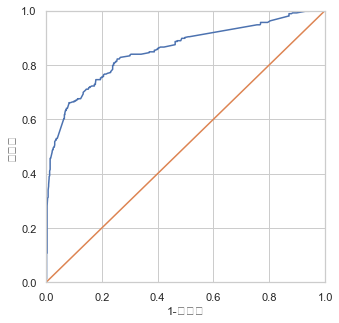

In [71]:
fpr, tpr, threshold = roc_curve(Y, logit_reg.predict_proba(Xs)[:, 1], pos_label=1)
# false positive rate: fp/(fp+tn) => 1-fpr: tn/(fp+tn): 특이도
# true positive rate: tp/(tp+fn): 민감도

roc_df = pd.DataFrame({'민감도': tpr, '1-특이도': fpr})

fig, ax = plt.subplots(1,1,figsize=(5,5))
roc_df.plot(x='1-특이도', y='민감도', legend=False, ax=ax)
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.plot((0,1),(0,1))
ax.set_xlabel('1-특이도')
ax.set_ylabel('민감도')

plt.show()

In [73]:
# 면적이 궁금하니까 면적 구해보기

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [76]:
auc(fpr, tpr) #아 1보다 좀 많이 떨어지긴 하지만 그래도 뭐..

0.8528185217141213